<h1>Retinal Image Analysis for Diabetic Retinopathy</h1>

<i>Dataset is taken from kaggle (Aptos 2019 Blindness Detection Dataset) 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load Train Dataset
train_df = pd.read_csv("train.csv")
train_images_path = "train_images/"
train_images = []

In [3]:
train_df.shape

(3662, 2)

In [4]:
train_df['diagnosis'].value_counts().sort_index()

diagnosis
0    1805
1     370
2     999
3     193
4     295
Name: count, dtype: int64

In [5]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
# Load and preprocess train images
for image_name in train_df['id_code']:
    image_path = os.path.join(train_images_path, image_name + ".png")
    image = Image.open(image_path).convert("RGB").resize((224, 224))
    train_images.append(np.array(image))

In [7]:
len(train_images)

3662

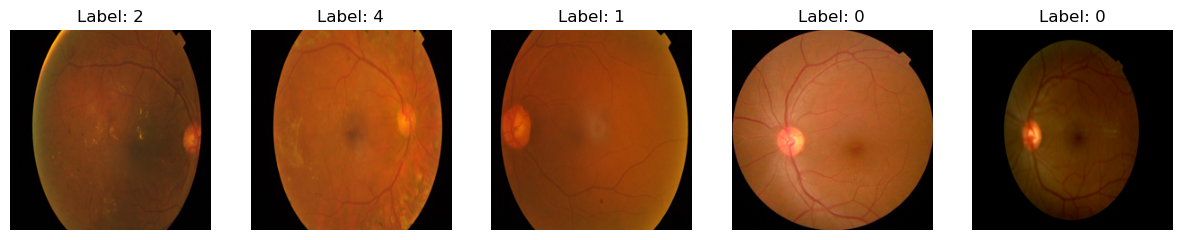

In [8]:
# Display first 5 images after loading
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i])
    plt.title('Label: {}'.format(train_df['diagnosis'][i]))
    plt.axis('off')
plt.show()

In [9]:
train_images = np.array(train_images)
train_images = train_images / 255.0

In [10]:
# Split Train Dataset
X_train,X_val,y_train,y_val=train_test_split(train_images, train_df['diagnosis'], test_size=0.2,random_state=42)

In [11]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape[3])

2929
224
224
3


In [12]:
print(len(X_train))
print(len(X_val))

2929
733


In [13]:
y_train.value_counts().sort_index()

diagnosis
0    1454
1     302
2     786
3     157
4     230
Name: count, dtype: int64

In [14]:
y_val.value_counts().sort_index()

diagnosis
0    351
1     68
2    213
3     36
4     65
Name: count, dtype: int64

In [15]:
X_train.shape

(2929, 224, 224, 3)

In [16]:
print(X_val.shape)

(733, 224, 224, 3)


In [17]:
y_train.shape

(2929,)

In [18]:
y_val.shape

(733,)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
# Define the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [21]:
# Initialize a list to store the results
results = []

In [22]:
# Function to calculate and append results
def append_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    results.append((model_name, accuracy, precision, f1, recall))

In [26]:
svm_model = SVC(C=1, kernel='poly')
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

SVC(C=1, kernel='poly')

In [27]:
y_val.head(10)

2059    0
1105    1
818     3
1237    4
463     0
410     0
3392    0
2600    4
1037    2
3075    2
Name: diagnosis, dtype: int64

In [28]:
svm_model.predict(X_val[:10].reshape(X_val[:10].shape[0], -1))

array([0, 0, 0, 2, 0, 0, 0, 2, 2, 2], dtype=int64)

In [29]:
svm_pred_val = svm_model.predict(X_val.reshape(X_val.shape[0], -1))

In [30]:
append_results('SVM', y_val, svm_pred_val)

In [31]:
results

[('SVM',
  0.7121418826739427,
  0.6044011688448636,
  0.6513040758531471,
  0.7121418826739427)]

In [32]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df         

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
SVM,0.712142,0.604401,0.651304,0.712142


In [33]:
cm = confusion_matrix(y_val, svm_pred_val)
cm

array([[343,   1,   7,   0,   0],
       [ 10,  18,  39,   1,   0],
       [ 35,  17, 161,   0,   0],
       [ 11,   5,  20,   0,   0],
       [ 17,   5,  43,   0,   0]], dtype=int64)

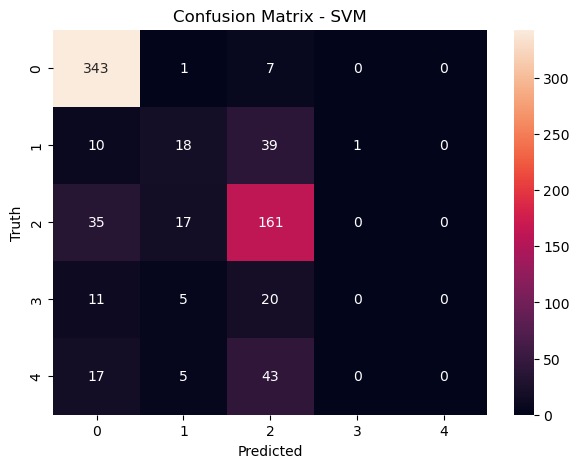

In [34]:
# Display confusion matrix for SVM
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SVM')
plt.show()

In [36]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='gini')
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

RandomForestClassifier(n_estimators=10)

In [37]:
y_val.head(10)

2059    0
1105    1
818     3
1237    4
463     0
410     0
3392    0
2600    4
1037    2
3075    2
Name: diagnosis, dtype: int64

In [38]:
rf_model.predict(X_val[:10].reshape(X_val[:10].shape[0], -1))

array([0, 0, 2, 2, 0, 0, 0, 2, 3, 2], dtype=int64)

In [39]:
rf_pred_val = rf_model.predict(X_val.reshape(X_val.shape[0], -1))

In [40]:
append_results('Random Forest', y_val, rf_pred_val)

In [41]:
results

[('SVM',
  0.7121418826739427,
  0.6044011688448636,
  0.6513040758531471,
  0.7121418826739427),
 ('Random Forest',
  0.73806275579809,
  0.6990846070203629,
  0.7103666385431823,
  0.73806275579809)]

In [42]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
SVM,0.712142,0.604401,0.651304,0.712142
Random Forest,0.738063,0.699085,0.710367,0.738063


In [43]:
cm = confusion_matrix(y_val, rf_pred_val)
cm

array([[343,   3,   5,   0,   0],
       [  9,  24,  28,   1,   6],
       [ 15,  21, 162,   5,  10],
       [  1,   1,  26,   4,   4],
       [  6,   6,  42,   3,   8]], dtype=int64)

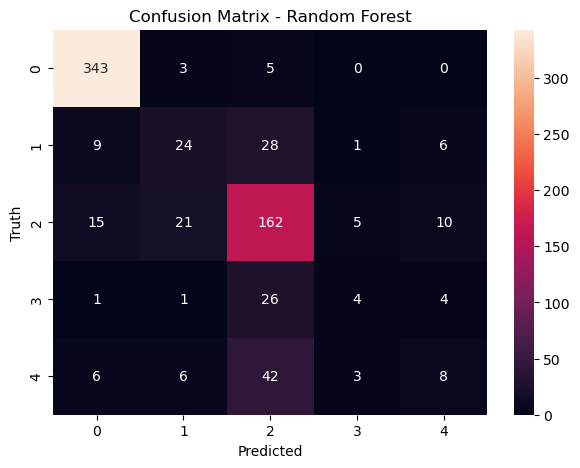

In [44]:
# Display confusion matrix for Random Forest
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
knn_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

KNeighborsClassifier(weights='distance')

In [46]:
knn_pred_val = knn_model.predict(X_val.reshape(X_val.shape[0], -1))

In [47]:
append_results('KNN', y_val, knn_pred_val)

In [44]:
results

[('SVM',
  0.7257844474761255,
  0.7138537020825413,
  0.679218343941646,
  0.7257844474761255),
 ('Random Forest',
  0.732605729877217,
  0.716200223467942,
  0.6949510743098264,
  0.732605729877217),
 ('KNN',
  0.6930422919508867,
  0.6438101801557305,
  0.6527081794675693,
  0.6930422919508867)]

In [48]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
SVM,0.712142,0.604401,0.651304,0.712142
Random Forest,0.738063,0.699085,0.710367,0.738063
KNN,0.701228,0.669158,0.679713,0.701228


In [49]:
cm = confusion_matrix(y_val, knn_pred_val)
cm

array([[336,   3,   9,   1,   2],
       [ 12,  21,  32,   2,   1],
       [ 24,  28, 140,   9,  12],
       [  5,   3,  20,   5,   3],
       [ 10,   7,  31,   5,  12]], dtype=int64)

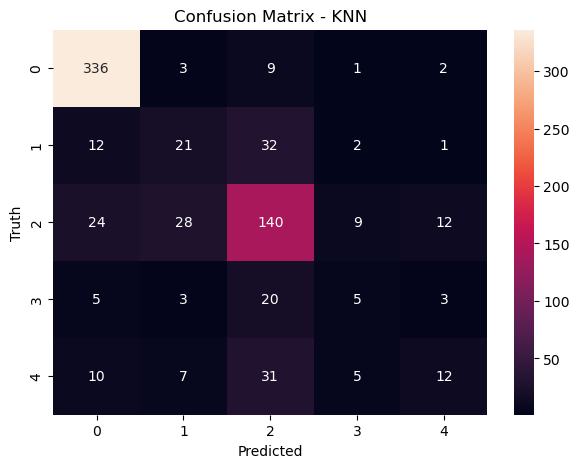

In [50]:
# Display confusion matrix for KNN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - KNN')
plt.show()

In [51]:
dt_model = DecisionTreeClassifier(criterion='log_loss')
dt_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

DecisionTreeClassifier(criterion='log_loss')

In [52]:
dt_pred_val = dt_model.predict(X_val.reshape(X_val.shape[0], -1))

In [ ]:
append_results('Decision Tree',y_val, dt_pred_val)

In [54]:
results

[('SVM',
  0.7121418826739427,
  0.6044011688448636,
  0.6513040758531471,
  0.7121418826739427),
 ('Random Forest',
  0.73806275579809,
  0.6990846070203629,
  0.7103666385431823,
  0.73806275579809),
 ('KNN',
  0.7012278308321964,
  0.6691579059365166,
  0.6797126984450302,
  0.7012278308321964),
 ('Decision Tree',
  0.6616643929058663,
  0.6634457610679306,
  0.6625218080449439,
  0.6616643929058663)]

In [55]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
SVM,0.712142,0.604401,0.651304,0.712142
Random Forest,0.738063,0.699085,0.710367,0.738063
KNN,0.701228,0.669158,0.679713,0.701228
Decision Tree,0.661664,0.663446,0.662522,0.661664


In [56]:
cm = confusion_matrix(y_val, dt_pred_val)
cm

array([[322,   8,  18,   2,   1],
       [  8,  22,  20,   9,   9],
       [ 16,  26, 121,  17,  33],
       [  1,   6,  17,   4,   8],
       [  5,   6,  32,   6,  16]], dtype=int64)

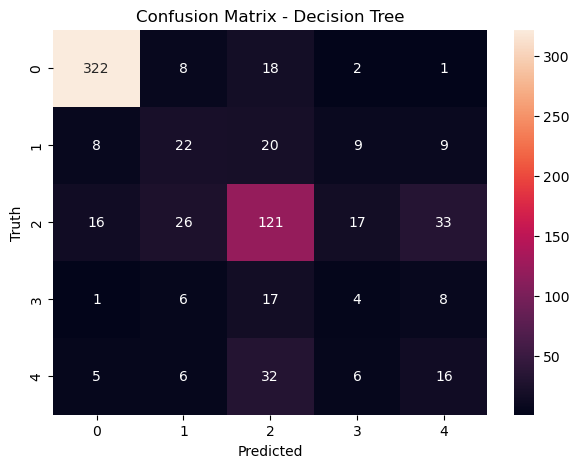

In [57]:
# Display confusion matrix for Decision Tree
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [58]:
# Train and evaluate Gaussian Naive Bayes
gnb_model = GaussianNB()

In [59]:
gnb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

GaussianNB()

In [62]:
gnb_pred_val = gnb_model.predict(X_val.reshape(X_val.shape[0], -1))

In [63]:
append_results('Gaussian Naive Bayes', y_val, gnb_pred_val)

In [64]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
SVM,0.712142,0.604401,0.651304,0.712142
Random Forest,0.738063,0.699085,0.710367,0.738063
KNN,0.701228,0.669158,0.679713,0.701228
Decision Tree,0.661664,0.663446,0.662522,0.661664
Gaussian Naive Bayes,0.481583,0.647116,0.507827,0.481583


In [65]:
cm = confusion_matrix(y_val, gnb_pred_val)
cm

array([[252,  56,   6,  35,   2],
       [  7,  47,   8,   5,   1],
       [ 11, 129,  42,  27,   4],
       [  2,  17,   7,  10,   0],
       [  4,  33,   9,  17,   2]], dtype=int64)

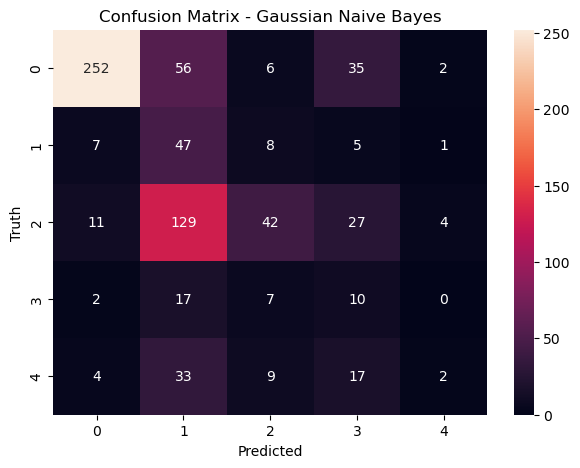

In [66]:
# Display confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [67]:
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

MultinomialNB(alpha=0.1)

In [68]:
mnb_pred_val = mnb_model.predict(X_val.reshape(X_val.shape[0], -1))

In [69]:
append_results('Multinomial Naive Bayes', y_val, mnb_pred_val)

In [70]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
SVM,0.712142,0.604401,0.651304,0.712142
Random Forest,0.738063,0.699085,0.710367,0.738063
KNN,0.701228,0.669158,0.679713,0.701228
Decision Tree,0.661664,0.663446,0.662522,0.661664
Gaussian Naive Bayes,0.481583,0.647116,0.507827,0.481583
Multinomial Naive Bayes,0.601637,0.711580,0.641831,0.601637


In [71]:
cm = confusion_matrix(y_val, mnb_pred_val)
cm

array([[274,  14,   5,  43,  15],
       [  7,  35,   4,   8,  14],
       [  8,  39, 105,  32,  29],
       [  3,  10,   8,  11,   4],
       [  4,   9,  20,  16,  16]], dtype=int64)

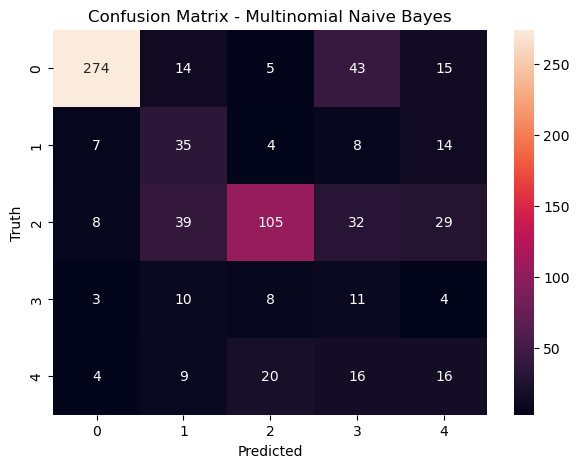

In [72]:
# Display confusion matrix for Multinomial Naive Bayes
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

In [24]:
mlr_model = LogisticRegression(max_iter=10000,multi_class='multinomial')

In [25]:
mlr_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [26]:
mlr_pred_val = mlr_model.predict(X_val.reshape(X_val.shape[0], -1))

In [27]:
append_results('Logistic Regression', y_val, mlr_pred_val)

In [28]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df  

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
Logistic Regression,0.725784,0.701444,0.708152,0.725784


In [29]:
cm = confusion_matrix(y_val, mlr_pred_val)
cm

array([[336,   6,   7,   1,   1],
       [ 10,  26,  29,   1,   2],
       [ 14,  27, 152,   7,  13],
       [  0,   4,  27,   3,   2],
       [  7,   8,  31,   4,  15]], dtype=int64)

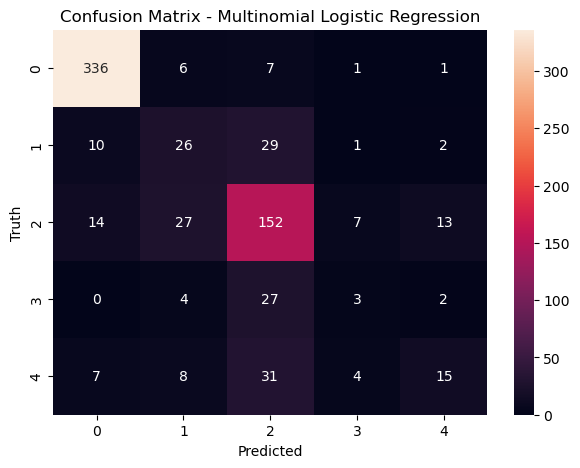

In [30]:
# Display confusion matrix for Multinomial Logistic Regression
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Multinomial Logistic Regression')
plt.show()

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [56]:
X_train.shape

(2929, 224, 224, 3)

In [57]:
X_val.shape

(733, 224, 224, 3)

In [58]:
X_train[0].shape

(224, 224, 3)

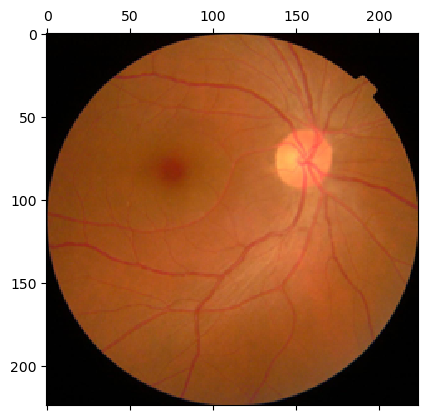

In [59]:
plt.matshow(X_train[0])

In [60]:
y_train

2181    0
570     0
3389    0
343     3
1801    0
       ..
1130    0
1294    1
860     2
3507    1
3174    0
Name: diagnosis, Length: 2929, dtype: int64

<h3 st<h3 style='color:purple'>Using ANN for classification</h3>

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [55]:
# Define the model
ann_model = keras.Sequential([
    Input(shape=(224,224,3)),
    keras.layers.Flatten(),
    Dense(100, activation='relu'), 
    Dense(5, activation='softmax')
])
ann_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.5028 - loss: 11.2970
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6381 - loss: 2.0615
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.6757 - loss: 1.4695
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.6679 - loss: 1.3805
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.6629 - loss: 1.2679
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 241ms/step - accuracy: 0.6990 - loss: 1.1116
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6960 - loss: 0.9827
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 240ms/step - accuracy: 0.7123 - loss: 0.9622
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.7037 - loss: 0.9969
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 263ms/step - accuracy: 0.5902 - loss: 0.9837


In [56]:
# Make predictions on the validation data
y_pred = ann_model.predict(X_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [57]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [58]:
ann_model.evaluate(X_val,y_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7067 - loss: 1.0132


[0.9906033277511597, 0.6998635530471802]

In [59]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       351
           1       0.57      0.12      0.20        68
           2       0.60      0.75      0.67       213
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        65

    accuracy                           0.70       733
   macro avg       0.39      0.37      0.34       733
weighted avg       0.59      0.70      0.62       733



In [60]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[345,   0,   6,   0,   0],
       [ 18,   8,  42,   0,   0],
       [ 52,   0, 160,   1,   0],
       [ 12,   3,  21,   0,   0],
       [ 24,   3,  38,   0,   0]], dtype=int64)

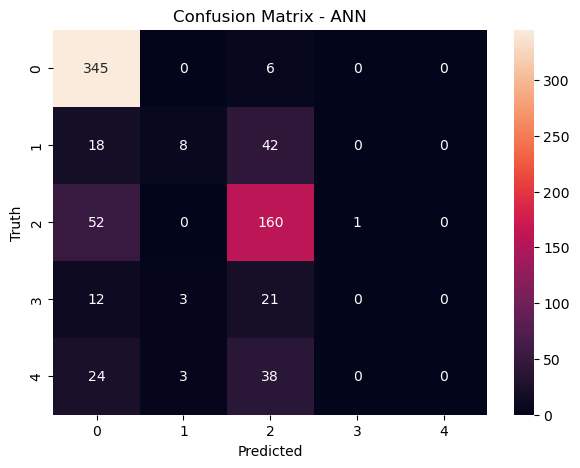

In [61]:
# Display confusion matrix for ANN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - ANN')
plt.show()

<h3 style='color:purple'>Using CNN for classification</h3>

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [41]:
cnn_model = keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6154 - loss: 1.3078
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7054 - loss: 0.7794
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7274 - loss: 0.7406
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.7349 - loss: 0.7140
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7385 - loss: 0.6904
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7669 - loss: 0.6230
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7641 - loss: 0.6432
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7797 - loss: 0.5743
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8127 - loss: 0.4979
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8169 - loss: 0.4840


In [42]:
# Make predictions on the validation data
y_pred = cnn_model.predict(X_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step


In [43]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [44]:
cnn_model.evaluate(X_val,y_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - accuracy: 0.7229 - loss: 0.8560


[0.8222546577453613, 0.7285129427909851]

In [45]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       351
           1       0.39      0.29      0.34        68
           2       0.59      0.81      0.68       213
           3       0.29      0.06      0.09        36
           4       0.32      0.11      0.16        65

    accuracy                           0.73       733
   macro avg       0.50      0.44      0.44       733
weighted avg       0.69      0.73      0.70       733



In [46]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[333,   3,  13,   1,   1],
       [  7,  20,  36,   0,   5],
       [ 11,  20, 172,   3,   7],
       [  1,   3,  28,   2,   2],
       [  8,   5,  44,   1,   7]], dtype=int64)

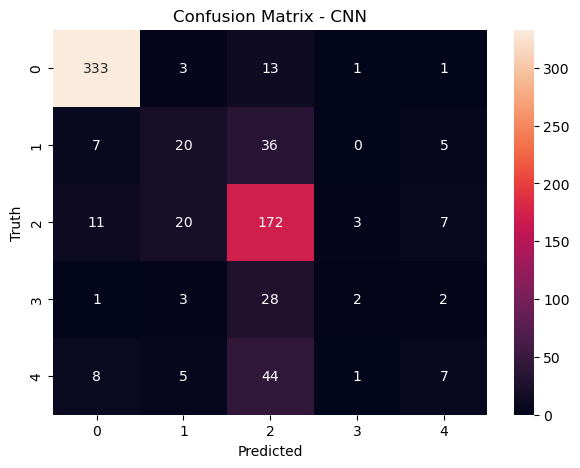

In [47]:
# Display confusion matrix for CNN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - CNN')
plt.show()

In [24]:
# Initialize a list to store the results
results = []

In [25]:
# Function to calculate and append results
def append_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    results.append((model_name, accuracy, precision, f1, recall))

<h3 style='color:purple'>Using CNN+ResNet50 model for classification</h3>

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [19]:
# Define the pre-trained ResNet50 model (include top=False to exclude final layers)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [20]:
# Freeze the pre-trained layers (optional)
for layer in resnet_model.layers:
    layer.trainable = False

In [21]:
# Create a new model on top of the pre-trained ResNet
resnet_hybrid_model = Sequential([
    resnet_model,
    Flatten(),  # Flatten the feature maps from ResNet
    Dense(256, activation='relu'),  # Dense layer with ReLU activation
    Dense(5, activation='softmax')  # Output layer with softmax for classification (adjust classes based on your task)
])

In [22]:
# Compile the hybrid model
resnet_hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
resnet_hybrid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.4328 - loss: 7.0373
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.5952 - loss: 1.1942
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 444s 5s/step - accuracy: 0.6385 - loss: 1.0312
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 455s 5s/step - accuracy: 0.6562 - loss: 0.9953
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 441s 5s/step - accuracy: 0.6786 - loss: 0.9499
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.6764 - loss: 0.9165
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step - accuracy: 0.6615 - loss: 0.9744
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.6769 - loss: 0.8907
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.6684 - loss: 0.8886
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 412s 4s/step - accuracy: 0.6882 - loss: 0.8755


In [26]:
# Make predictions on the validation data
y_pred = resnet_hybrid_model.predict(X_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step


In [27]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [28]:
append_results('ResNet50', y_val, y_pred_classes)

In [29]:
results

[('ResNet50',
  0.6834924965893588,
  0.5879707077121782,
  0.6132954878930008,
  0.6834924965893588)]

In [30]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df 

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
ResNet50,0.683492,0.587971,0.613295,0.683492


In [31]:
resnet_hybrid_model.evaluate(X_val,y_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.6922 - loss: 0.8527


[0.87302565574646, 0.6834924817085266]

In [32]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       351
           1       0.00      0.00      0.00        68
           2       0.49      0.96      0.65       213
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        65

    accuracy                           0.68       733
   macro avg       0.28      0.36      0.31       733
weighted avg       0.59      0.68      0.61       733



In [33]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[297,   0,  54,   0,   0],
       [  7,   0,  61,   0,   0],
       [  9,   0, 204,   0,   0],
       [  3,   0,  33,   0,   0],
       [  4,   0,  61,   0,   0]], dtype=int64)

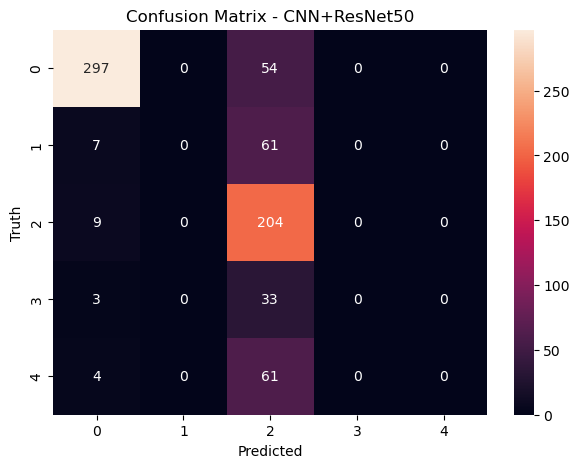

In [34]:
# Display confusion matrix for CNN+ResNet50
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - CNN+ResNet50')
plt.show()

<h3 style='color:purple'>Using CNN+DenseNet121 model for classification</h3>

In [38]:
from keras.applications import DenseNet121

In [39]:
# Load the DenseNet121 model pre-trained on ImageNet without the top classification layer
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [40]:
# Freeze the weights of the pre-trained layers
for layer in densenet_model.layers:
    layer.trainable = False

In [41]:
# Create a Sequential model with the DenseNet base
densenet_hybrid_model = Sequential([
    densenet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for classification 
])

In [42]:
# Compile the model
densenet_hybrid_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

In [43]:
# Train the model
densenet_hybrid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.6076 - loss: 11.9465
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.8005 - loss: 0.7148
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.8612 - loss: 0.4119
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 499s 5s/step - accuracy: 0.8811 - loss: 0.3588
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 551s 6s/step - accuracy: 0.9079 - loss: 0.2494
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 526s 5s/step - accuracy: 0.9554 - loss: 0.1455
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 528s 6s/step - accuracy: 0.9554 - loss: 0.1156
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.9437 - loss: 0.1597
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 473s 5s/step - accuracy: 0.9686 - loss: 0.1125
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.9600 - loss: 0.1106


In [44]:
# Make predictions on the validation data
y_pred = densenet_hybrid_model.predict(X_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step


In [45]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [47]:
append_results('DenseNet121', y_val, y_pred_classes)

In [48]:
results

[('ResNet50',
  0.6834924965893588,
  0.5879707077121782,
  0.6132954878930008,
  0.6834924965893588),
 ('DenseNet121',
  0.7789904502046384,
  0.7674558761661202,
  0.7513157994098424,
  0.7789904502046384)]

In [49]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df 

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
ResNet50,0.683492,0.587971,0.613295,0.683492
DenseNet121,0.778990,0.767456,0.751316,0.778990


In [46]:
densenet_hybrid_model.evaluate(X_val,y_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.7850 - loss: 1.2715


[1.2266961336135864, 0.7789904475212097]

In [50]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       351
           1       0.48      0.49      0.48        68
           2       0.66      0.89      0.75       213
           3       0.40      0.17      0.24        36
           4       0.58      0.11      0.18        65

    accuracy                           0.78       733
   macro avg       0.62      0.52      0.52       733
weighted avg       0.77      0.78      0.75       733



In [51]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[336,  13,   2,   0,   0],
       [  8,  33,  26,   1,   0],
       [  4,  18, 189,   2,   0],
       [  0,   1,  24,   6,   5],
       [  1,   4,  47,   6,   7]], dtype=int64)

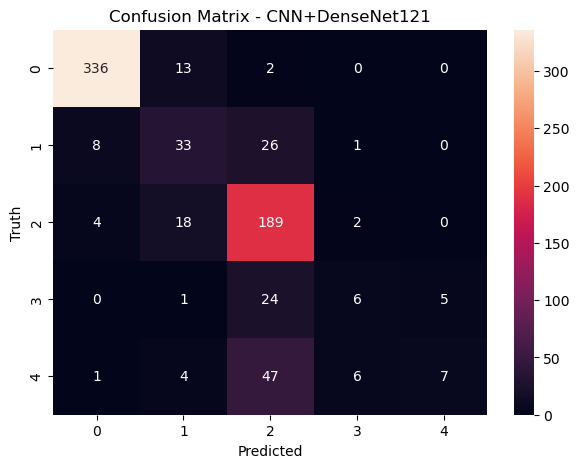

In [52]:
# Display confusion matrix for CNN+DenseNet121
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - CNN+DenseNet121')
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the InceptionV3 base model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the InceptionV3 base model
for layer in inception_model.layers:
    layer.trainable = False

# Create a Sequential model with the InceptionV3 base
inception_hybrid_model = Sequential([
    inception_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for classification
])

# Compile the model
inception_hybrid_model.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
# Fit the InceptionV3-based hybrid model
inception_hybrid_model.fit(X_train, y_train, epochs=10)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG16 base model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the VGG16 base model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a Sequential model with the VGG16 base
vgg_hybrid_model = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for classification
])

# Compile the model
vgg_hybrid_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
# Fit the VGG16-based hybrid model
vgg_hybrid_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


<h3 style='color:purple'>Using CNN+InceptionV3 model for classification</h3>

In [53]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [54]:
# Load the InceptionV3 base model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [55]:
# Freeze the layers of the InceptionV3 base model
for layer in inception_model.layers:
    layer.trainable = False

In [1]:
# Create a Sequential model with the InceptionV3 base
inception_hybrid_model = Sequential([
    inception_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for classification
])

NameError: name 'Sequential' is not defined

In [57]:
# Compile the model
inception_hybrid_model.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

In [58]:
# Fit the InceptionV3-based hybrid model
inception_hybrid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.5466 - loss: 15.2914
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.7908 - loss: 0.6305
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.8546 - loss: 0.4034
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.8957 - loss: 0.3012
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.9314 - loss: 0.1866
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9679 - loss: 0.1168
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.9669 - loss: 0.1082
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9640 - loss: 0.1119
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9740 - loss: 0.0840
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.9734 - loss: 0.0873


In [59]:
# Make predictions on the validation data
y_pred = inception_hybrid_model.predict(X_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step


In [60]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [61]:
append_results('InceptionV3', y_val, y_pred_classes)

In [62]:
results

[('ResNet50',
  0.6834924965893588,
  0.5879707077121782,
  0.6132954878930008,
  0.6834924965893588),
 ('DenseNet121',
  0.7789904502046384,
  0.7674558761661202,
  0.7513157994098424,
  0.7789904502046384),
 ('InceptionV3',
  0.7121418826739427,
  0.7364896984116494,
  0.7023314549390851,
  0.7121418826739427)]

In [63]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df 

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
ResNet50,0.683492,0.587971,0.613295,0.683492
DenseNet121,0.778990,0.767456,0.751316,0.778990
InceptionV3,0.712142,0.736490,0.702331,0.712142


In [64]:
inception_hybrid_model.evaluate(X_val,y_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7239 - loss: 1.3593


[1.3160576820373535, 0.7121418714523315]

In [65]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       351
           1       0.42      0.41      0.41        68
           2       0.60      0.79      0.68       213
           3       0.25      0.42      0.32        36
           4       0.56      0.08      0.14        65

    accuracy                           0.71       733
   macro avg       0.56      0.51      0.49       733
weighted avg       0.74      0.71      0.70       733



In [66]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[306,  20,  23,   1,   1],
       [  5,  28,  33,   2,   0],
       [  5,  16, 168,  23,   1],
       [  1,   0,  18,  15,   2],
       [  0,   3,  39,  18,   5]], dtype=int64)

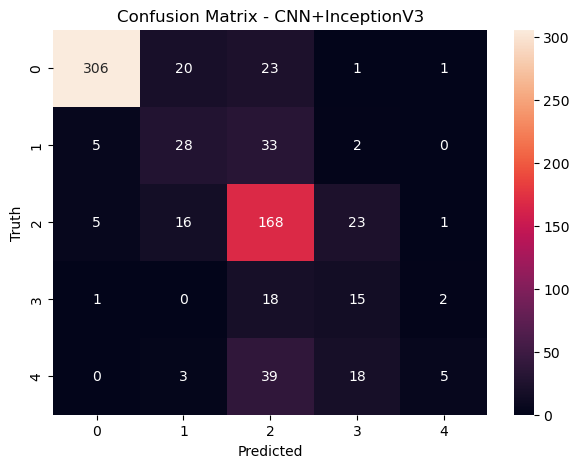

In [67]:
# Display confusion matrix for CNN+InceptionV3
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - CNN+InceptionV3')
plt.show()

In [21]:
# Initialize a list to store the results
res = []

In [22]:
# Function to calculate and append results
def append_results(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    res.append((model_name, accuracy, precision, f1, recall))

<h3 style='color:purple'>Using CNN+VGG16 model for classification</h3>

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [24]:
# Load the VGG16 base model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [25]:
# Freeze the layers of the VGG16 base model
for layer in vgg_model.layers:
    layer.trainable = False

In [26]:
# Create a Sequential model with the VGG16 base
vgg_hybrid_model = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Output layer for classification
])

In [27]:
# Compile the model
vgg_hybrid_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [28]:
# Fit the VGG16-based hybrid model
vgg_hybrid_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 926s 10s/step - accuracy: 0.6139 - loss: 1.7833
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 921s 10s/step - accuracy: 0.7465 - loss: 0.7249
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 933s 10s/step - accuracy: 0.7585 - loss: 0.6485
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 910s 10s/step - accuracy: 0.7655 - loss: 0.6097
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 912s 10s/step - accuracy: 0.7932 - loss: 0.5577
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 912s 10s/step - accuracy: 0.7933 - loss: 0.5530
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 910s 10s/step - accuracy: 0.8206 - loss: 0.4819
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 911s 10s/step - accuracy: 0.8371 - loss: 0.4465
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 911s 10s/step - accuracy: 0.8468 - loss: 0.4100
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 912s 10s/step - accuracy: 0.8481 - loss: 0.3964


In [29]:
# Make predictions on the validation data
y_pred = vgg_hybrid_model.predict(X_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step


In [30]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [31]:
append_results('VGG16', y_val, y_pred_classes)

In [33]:
res

[('VGG16',
  0.762619372442019,
  0.7367269357840069,
  0.7405069670950114,
  0.762619372442019)]

In [34]:
# Create a DataFrame to store the results
temp_df = pd.DataFrame(res, columns=['Model', 'Accuracy', 'Avg Precision', 'Avg F1-Score', 'Avg Recall'])
temp_df.set_index('Model', inplace=True)
temp_df 

,Accuracy,Avg Precision,Avg F1-Score,Avg Recall
Model,,,,
VGG16,0.762619,0.736727,0.740507,0.762619


In [35]:
vgg_hybrid_model.evaluate(X_val,y_val)

23/23 ━━━━━━━━━━━━━━━━━━━━ 227s 10s/step - accuracy: 0.7822 - loss: 0.8045


[0.7235573530197144, 0.7626193761825562]

In [36]:
# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, zero_division=0.0))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       351
           1       0.47      0.56      0.51        68
           2       0.67      0.72      0.69       213
           3       0.29      0.06      0.09        36
           4       0.59      0.31      0.40        65

    accuracy                           0.76       733
   macro avg       0.58      0.53      0.53       733
weighted avg       0.74      0.76      0.74       733



In [37]:
cm = confusion_matrix(y_val, y_pred_classes)
cm

array([[346,   5,   0,   0,   0],
       [ 11,  38,  17,   1,   1],
       [ 21,  27, 153,   2,  10],
       [  1,   5,  25,   2,   3],
       [  5,   5,  33,   2,  20]], dtype=int64)

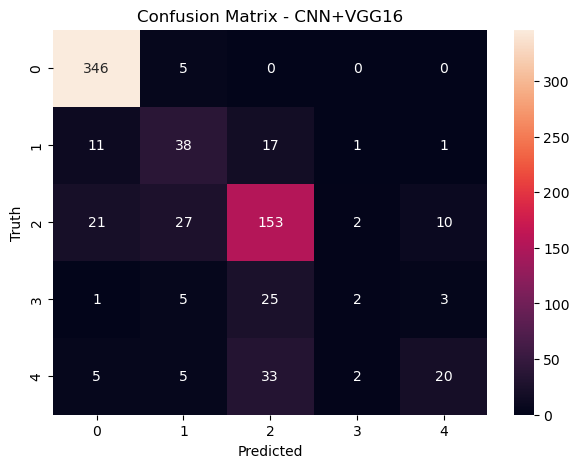

In [38]:
# Display confusion matrix for CNN+VGG16
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - CNN+VGG16')
plt.show()